## Causal Impact ##

Bayesian Structural time series model that estimates the effect of a designed intervention on a target series <br>


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

In [5]:
from causalimpact import CausalImpact

In [6]:
np.random.seed(1234)

In [7]:
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

In [8]:
arma_process

ArmaProcess([1.0, 0.9], [1.0], nobs=100) at 0x7f888355a460

In [9]:
arma_process.isstationary

True

Create the time series

In [14]:
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 5 #Add the event

In [15]:
import matplotlib.pyplot as plt

In [16]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

In [17]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    124.64             3739.2
Prediction (s.d.)         119.8 (0.2)        3593.88 (5.85)
95% CI                    [119.4, 120.17]    [3582.08, 3605.02]

Absolute effect (s.d.)    4.84 (0.2)         145.32 (5.85)
95% CI                    [4.47, 5.24]       [134.18, 157.13]

Relative effect (s.d.)    4.04% (0.16%)      4.04% (0.16%)
95% CI                    [3.73%, 4.37%]     [3.73%, 4.37%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [18]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 124.64. By contrast, in the absence of an
intervention, we would have expected an average response of 119.8.
The 95% interval of this counterfactual prediction is [119.4, 120.17].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.84 with a 95% interval of
[4.47, 5.24]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3739.2.
By contrast, had the intervention not taken place, we would have expected
a sum of 3593.88. The 95% interval of this prediction is [3582.08, 3605.02].


The above results are given in terms of absolute numbers. In relative
terms, the response vari

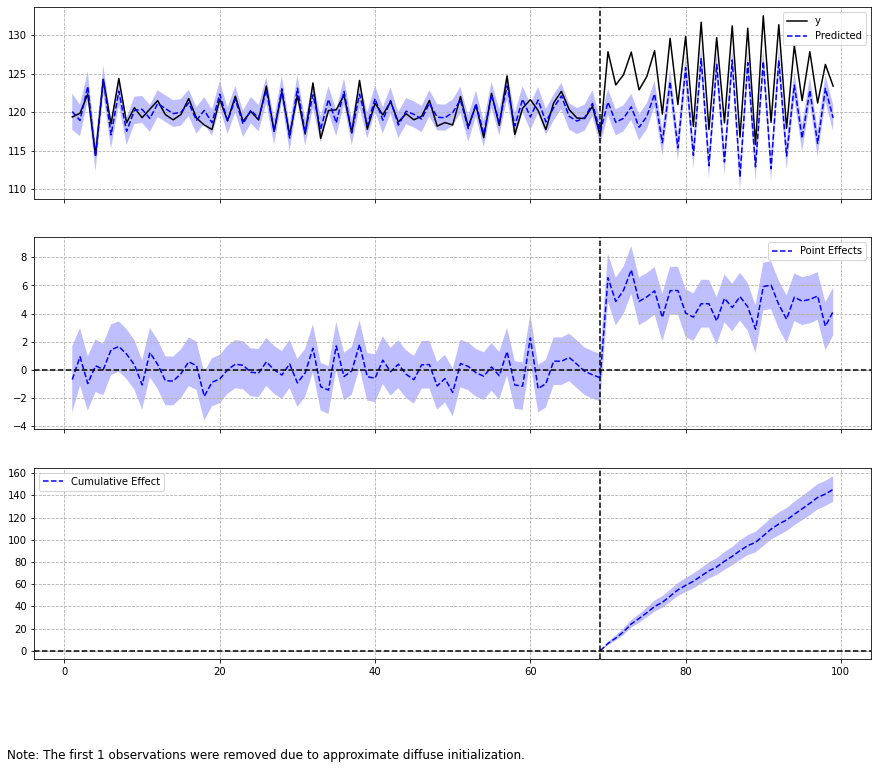

In [20]:
ci.plot()

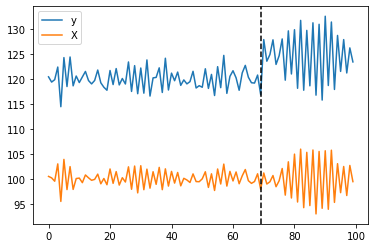

In [22]:
data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend();